# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

Channel  Mean_Alert  Std_Alert  Mean_Drowsy  Std_Drowsy
0         1    0.120450  17.630071    -0.163686   10.802148
1         2    0.082160  17.209800    -0.163763   12.170468
2         3    0.052289   9.635932    -0.061430    9.706984
3         4    0.002035  30.798487    -0.113082   11.617223
4         5    0.022715   9.642534    -0.159155   11.707889
5         6    0.021788  26.476227    -0.154311   17.197473
6         7    0.019232  12.678096    -0.126242    9.635353
7         8    0.046900   8.752803    -0.070030    9.094665
8         9    0.023307   9.758593    -0.130595   11.230886
9        10    0.017935   9.891951    -0.138523   12.140691
10       11    0.026675  10.078026    -0.140926   11.493215
11       12    0.025204   9.419806    -0.115374    9.258657
12       13    0.030227   8.676220     0.289249  125.220203
13       14   -0.003453   9.422395    -0.105336   10.629389
14       15    0.020169   9.812209    -0.135267   11.993222
15       16    0.006739   9.497671    -0.118931   10.848385
16       17    0.019268   9.657509    -0.100339   13.435700
17       18    0.017605   8.470344    -0.022570   24.811520
18       19   -0.004788   9.078733    -0.100146   10.261368
19       20    0.019624   9.308660    -0.128844   11.225245
20       21   -0.007867   9.224565    -0.103152   10.433308
21       22    0.021766   8.139648    -0.056785    7.689594
22       23    0.007225   7.684455    -0.060255    8.109360
23       24   -0.003592   8.780666    -0.096036    9.909463
24       25    0.019598   9.051293    -0.118028   10.804096
25       26    0.010883   8.877545    -0.107124    9.976398
26       27    0.033979   7.612370    -0.062159    8.179160
27       28    0.010209   8.213521    -0.026352   10.028616
28       29   -0.011278   8.012658    -0.017755    9.505379
29       30    0.016158   8.402189    -0.030039    9.875275

## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Data Manipulation</h2>
    
</div>


# Segregating the data into alert and drowsy states

In [15]:
import scipy.io

In [16]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

In [17]:
# Segregate the data into alert and drowsy states
alert_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 0, :]
drowsy_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 1, :]

In [18]:
# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

# Data Manipulation - Alert State

In [19]:
# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_alert_data = np.transpose(alert_data['EEGsample'], (0, 2, 1))

transposed_alert_data.shape

(1011, 384, 30)

In [20]:
# Concatenate all the samples together
Manipulated_Alert_Data = np.concatenate(transposed_alert_data, axis=0)

Manipulated_Alert_Data.shape

(388224, 30)

In [21]:
# Create a new dataframe with the concatenated EEG values
Manipulated_Alert_Data = pd.DataFrame(Manipulated_Alert_Data)

In [22]:
Manipulated_Alert_Data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_Alert_Data['substate'] = 0

In [23]:
Manipulated_Alert_Data_shape = Manipulated_Alert_Data.shape
print(Manipulated_Alert_Data_shape)

(388224, 31)


In [24]:
Manipulated_Alert_Data

EEG 1      EEG 2      EEG 3      EEG 4      EEG 5      EEG 6  \
0        4.080976   3.786023   8.346804   6.719097   8.357521   8.916676   
1        5.363737   6.188060   8.691601   6.594982   7.950093   8.835506   
2        2.168923   1.727106  -0.010906  10.583628   2.440252   1.746089   
3        6.682761   4.633752   2.093427  16.253235   6.105603   3.943814   
4        9.795314   8.723788  10.936554   8.182007   8.306618   7.103265   
...           ...        ...        ...        ...        ...        ...   
388219   8.233965   0.275736   6.446871   5.908036   9.747110  11.439683   
388220   7.406664   9.878674  -3.062066   9.699165  12.825886  16.227294   
388221  13.849187  15.022659  -0.428879  12.096121  18.726862  20.367732   
388222  16.960690  11.183629   8.472685   8.712444  17.208050  19.493375   
388223   6.120572   0.036418   4.256910  10.888335  13.246690  23.589833   

            EEG 7      EEG 8      EEG 9     EEG 10  ...     EEG 22     EEG 23  \
0        6.862104   9.614278   8.955653  11.076102  ...   4.477457   1.590643   
1        7.987136   8.394441   7.126653   8.356511  ...   2.415757   1.918520   
2        1.159202  -1.002561   7.059705   1.720240  ...  -4.692833   4.261903   
3        4.016592   2.393903  17.343024   6.441727  ...   0.839859   2.543160   
4        7.980278  12.270826   9.309045   6.750704  ...   2.970653  -0.216052   
...           ...        ...        ...        ...  ...        ...        ...   
388219  -1.685268   5.394103   5.898229  12.230832  ...  -6.909897  -8.072416   
388220  11.658202   0.792909   8.312962  14.986136  ...  -4.750323  -9.749710   
388221  21.341497  -0.920176  11.466241  19.145924  ...   2.819010 -14.607244   
388222  19.953374   2.115628  10.656352  18.752221  ...   9.265103 -15.256238   
388223  10.331308  -1.348828   9.539433  14.732780  ...  10.627132 -12.477297   

          EEG 24     EEG 25    EEG 26    EEG 27     EEG 28    EEG 29  \
0       8.856600   6.898189  3.846108  1.618809   1.528848 -1.199498   
1       7.423708   3.755487  1.427838 -0.657721   0.793796 -1.544962   
2       3.151329  -1.637562 -5.816451 -8.913891  -1.451266 -4.319859   
3       7.499411   4.182199 -0.059025 -0.736035   4.434387  3.438641   
4       5.413562   5.600711  2.837383  4.172009   0.202442  1.743480   
...          ...        ...       ...       ...        ...       ...   
388219 -0.579174   5.365872 -2.507618 -7.071795  -5.722929  2.618950   
388220  0.661105   7.605404  0.084582 -4.264237  -3.538781  3.539202   
388221  1.367658  10.402462  6.190984  3.495143  -5.398682  3.006524   
388222 -1.057022   8.016603  8.461495  8.418237  -9.056400  0.705703   
388223 -5.111024   2.032405  3.446180  9.829986 -12.673040 -3.879452   

          EEG 30  substate  
0       1.594009         0  
1       1.900514         0  
2      -4.644263         0  
3       1.207515         0  
4       3.413565         0  
...          ...       ...  
388219 -3.075700         0  
388220 -0.909379         0  
388221 -0.195928         0  
388222 -0.641096         0  
388223 -3.535439         0  

[388224 rows x 31 columns]

In [25]:
Manipulated_Alert_Data.describe()

EEG 1          EEG 2          EEG 3          EEG 4  \
count  388224.000000  388224.000000  388224.000000  388224.000000   
mean        0.120450       0.082160       0.052289       0.002035   
std        17.630093      17.209822       9.635944      30.798527   
min      -573.236473   -1299.322323    -179.743368   -1302.310821   
25%        -4.776408      -5.200087      -4.309381      -5.210375   
50%        -0.075639      -0.078809       0.021210      -0.007062   
75%         4.674139       5.061314       4.318260       5.122598   
max       871.907755     911.153120     243.285973    1795.543933   

               EEG 5          EEG 6          EEG 7          EEG 8  \
count  388224.000000  388224.000000  388224.000000  388224.000000   
mean        0.022715       0.021788       0.019232       0.046900   
std         9.642547      26.476261      12.678112       8.752815   
min      -259.186417   -1914.601674    -496.506648    -257.126168   
25%        -5.136774      -5.298737      -4.533854      -3.814357   
50%        -0.025080      -0.004596       0.032909       0.000847   
75%         5.058932       5.269095       4.578348       3.898470   
max       157.868435    1116.638265     754.210204     178.262784   

               EEG 9         EEG 10  ...         EEG 22         EEG 23  \
count  388224.000000  388224.000000  ...  388224.000000  388224.000000   
mean        0.023307       0.017935  ...       0.021766       0.007225   
std         9.758606       9.891964  ...       8.139659       7.684464   
min      -264.446044    -170.110365  ...    -412.436568    -164.084974   
25%        -5.077397      -5.446187  ...      -3.618430      -3.631967   
50%         0.002038      -0.015818  ...       0.072676       0.064908   
75%         5.029046       5.397253  ...       3.720945       3.728646   
max       358.262495     172.711611  ...     169.197791     221.973860   

              EEG 24         EEG 25         EEG 26         EEG 27  \
count  388224.000000  388224.000000  388224.000000  388224.000000   
mean       -0.003592       0.019598       0.010883       0.033979   
std         8.780677       9.051305       8.877557       7.612380   
min      -182.130863    -160.504457    -188.102204    -300.202835   
25%        -4.483550      -4.728144      -4.541708      -3.618739   
50%         0.021311       0.014776       0.011861       0.067332   
75%         4.505347       4.764787       4.597949       3.740409   
max       228.132948     167.531582     191.191891     159.280290   

              EEG 28         EEG 29         EEG 30  substate  
count  388224.000000  388224.000000  388224.000000  388224.0  
mean        0.010209      -0.011278       0.016158       0.0  
std         8.213531       8.012668       8.402200       0.0  
min      -155.316775    -164.679904    -170.630668       0.0  
25%        -3.935085      -3.812024      -3.973197       0.0  
50%         0.070167       0.027562       0.061650       0.0  
75%         4.070610       3.884409       4.121255       0.0  
max       153.842957     148.846683     146.055474       0.0  

[8 rows x 31 columns]

### Manipulated Alert Data Visualizations

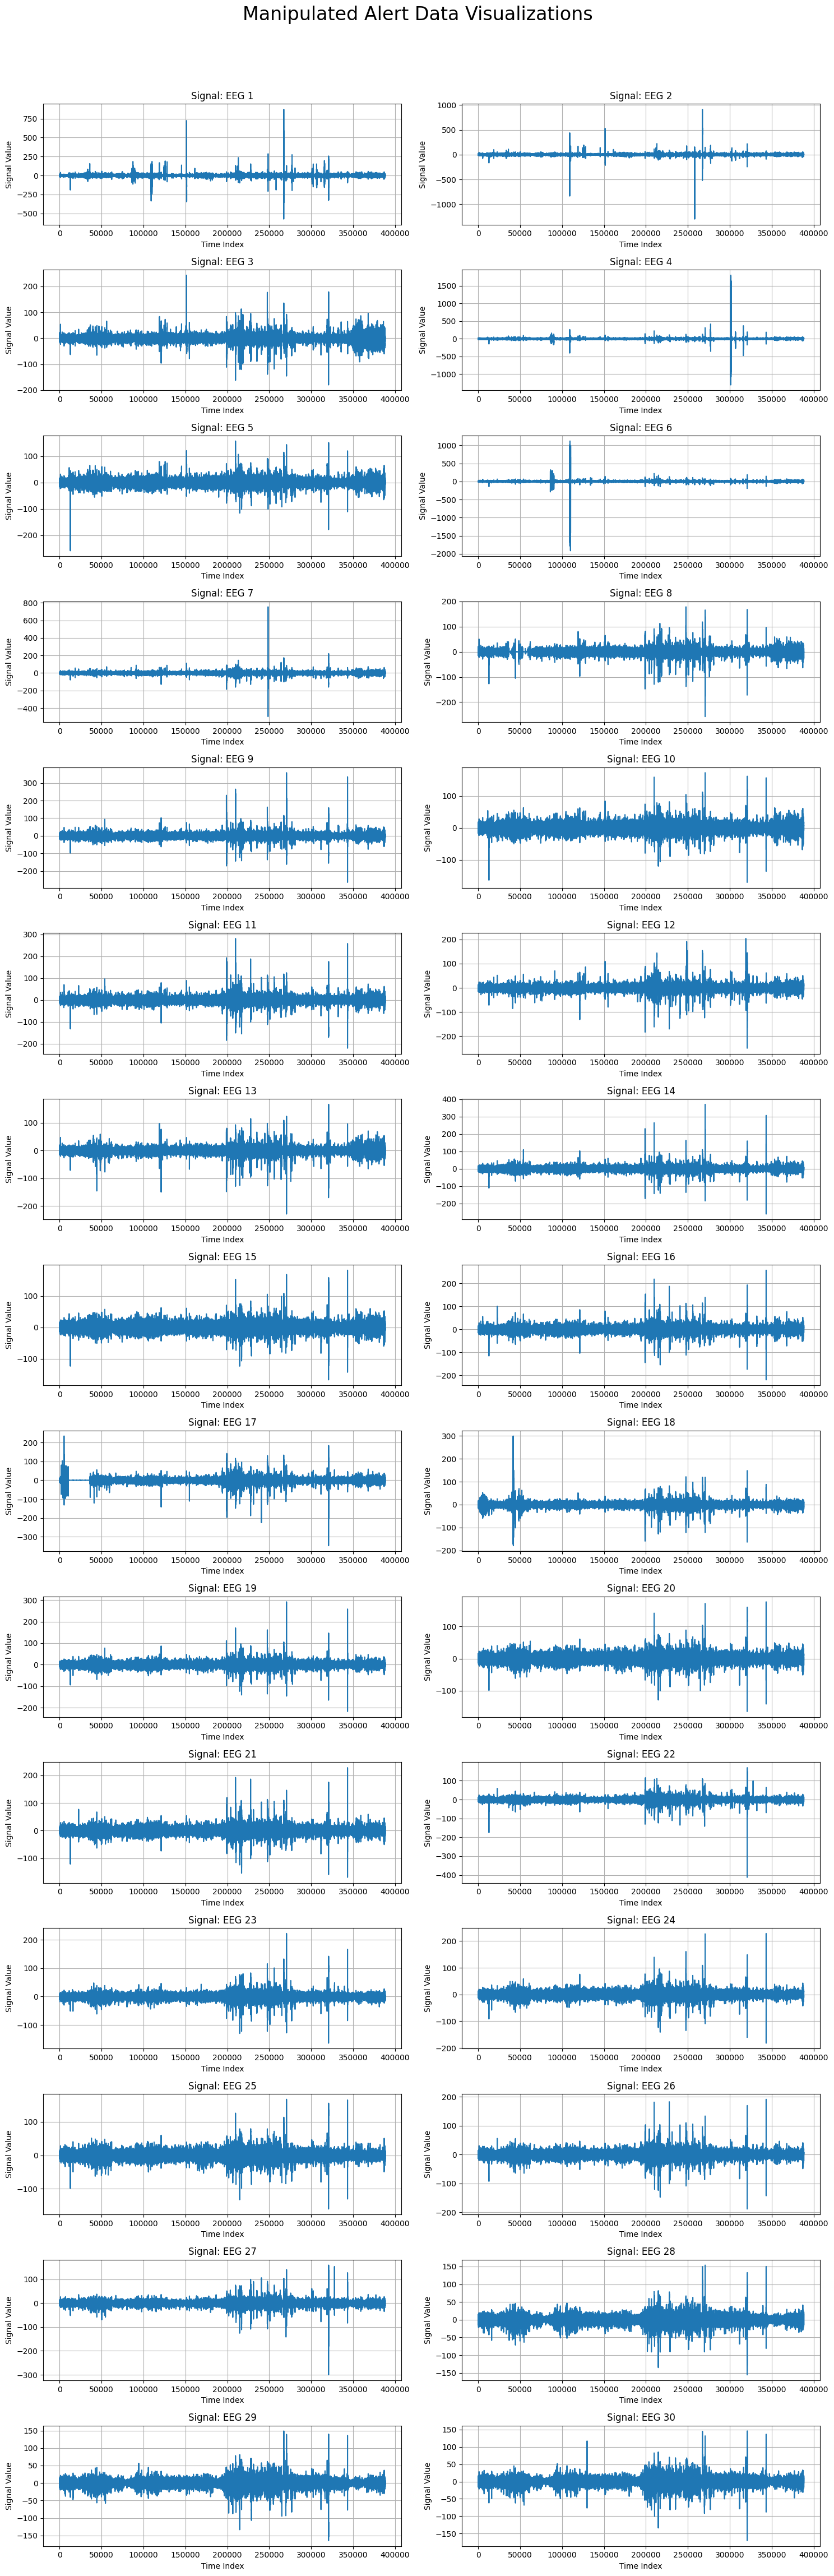

In [26]:
columns_of_interest = Manipulated_Alert_Data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_Alert_Data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Alert Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Data Manipulation - Drowsy State

In [27]:
# Load the alert data
drowsy_data = scipy.io.loadmat('drowsy_data.mat')

# Transpose the EEGsample for each sample
transposed_drowsy_data = np.transpose(drowsy_data['EEGsample'], (0, 2, 1))

transposed_drowsy_data.shape

(1011, 384, 30)

In [28]:
# Concatenate all the samples together
Manipulated_drowsy_data = np.concatenate(transposed_drowsy_data, axis=0)

Manipulated_drowsy_data.shape

(388224, 30)

In [29]:
# Create a new dataframe with the concatenated EEG values
Manipulated_drowsy_data = pd.DataFrame(Manipulated_drowsy_data)

In [30]:
Manipulated_drowsy_data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_drowsy_data['substate'] = 1

Manipulated_drowsy_data

EEG 1     EEG 2      EEG 3      EEG 4      EEG 5      EEG 6  \
0      -9.340455 -2.581835   0.605112  -1.951353  -1.691814   0.000079   
1      -9.297278  1.208397   1.506896  -2.264259  -0.276102   2.584222   
2      -5.377346  4.373476   1.989039   0.960820   4.204186   7.833417   
3      -0.387827  6.691171   5.519700   7.556678   9.908533   9.829516   
4       4.371176  8.625327   7.997311  13.974010  13.865399  12.207135   
...          ...       ...        ...        ...        ...        ...   
388219  6.868306  2.037630  10.935329   3.053171   2.061508  -2.051896   
388220  3.248673 -3.479991   8.520732  -0.933774  -2.160580  -5.932663   
388221  5.805058  2.770440   8.983543   1.738981  -0.541900  -8.541175   
388222  7.142978  0.775242   9.888220   4.223264   0.790337  -6.479811   
388223  5.365745 -2.340104  10.145127   3.204299   0.128407  -4.656551   

            EEG 7     EEG 8      EEG 9     EEG 10  ...    EEG 22    EEG 23  \
0        3.330641 -0.191926  -4.416670  -1.147983  ...  2.129284 -3.047745   
1        6.163738  1.151379  -4.483509   0.162938  ...  5.101435 -6.010214   
2        6.751105  1.460457  -1.914790   4.162968  ...  4.944842 -5.937366   
3        7.316607  5.024432   4.905958  11.028363  ...  7.509409 -2.738498   
4        6.853086  7.709539  11.165707  16.520067  ...  9.410449  0.360403   
...           ...       ...        ...        ...  ...       ...       ...   
388219  -6.980084  6.915801   1.292861  -2.156677  ...  0.466622  1.703162   
388220 -12.832424  4.543766  -2.418177  -6.189452  ... -1.080016  2.258167   
388221  -8.517280  3.491680  -1.389771  -5.822860  ... -3.365152  3.624552   
388222 -12.121178  4.921120   0.083320  -4.330250  ... -2.798542  4.248466   
388223 -13.939822  9.154483   1.264282  -3.263205  ... -2.442473  4.421849   

          EEG 24     EEG 25     EEG 26    EEG 27    EEG 28    EEG 29  \
0      -4.376038  -3.188374  -0.385878  1.875040 -5.343100 -3.923701   
1      -4.166642  -2.759660   1.960440  2.900005 -5.235632 -4.409118   
2      -2.171945   1.778525   4.798910  3.802374 -4.404817 -2.675341   
3       3.898276   9.131125  11.175130  7.386306 -0.541670  2.996915   
4       9.101561  13.200414  15.277298  6.949633 -0.142043  4.255927   
...          ...        ...        ...       ...       ...       ...   
388219  0.489967  -0.037224  -1.715912  1.355944  0.816035  0.522263   
388220 -0.767202  -2.633476  -5.121715 -0.736463  0.412399 -0.159130   
388221  0.280940  -3.084484  -4.691478 -3.197477  0.923831  1.341110   
388222  1.042023  -2.643634  -3.409195 -2.482608  1.644079  1.565844   
388223  3.490519  -0.725364  -2.018021 -1.486724  2.468541  1.679269   

          EEG 30  substate  
0      -2.074438         1  
1      -0.922046         1  
2       1.579044         1  
3       6.289799         1  
4       8.020452         1  
...          ...       ...  
388219 -0.399985         1  
388220 -2.200928         1  
388221 -1.338262         1  
388222 -0.301095         1  
388223  0.412523         1  

[388224 rows x 31 columns]

### Manipulated Drowsy Data Visualizations

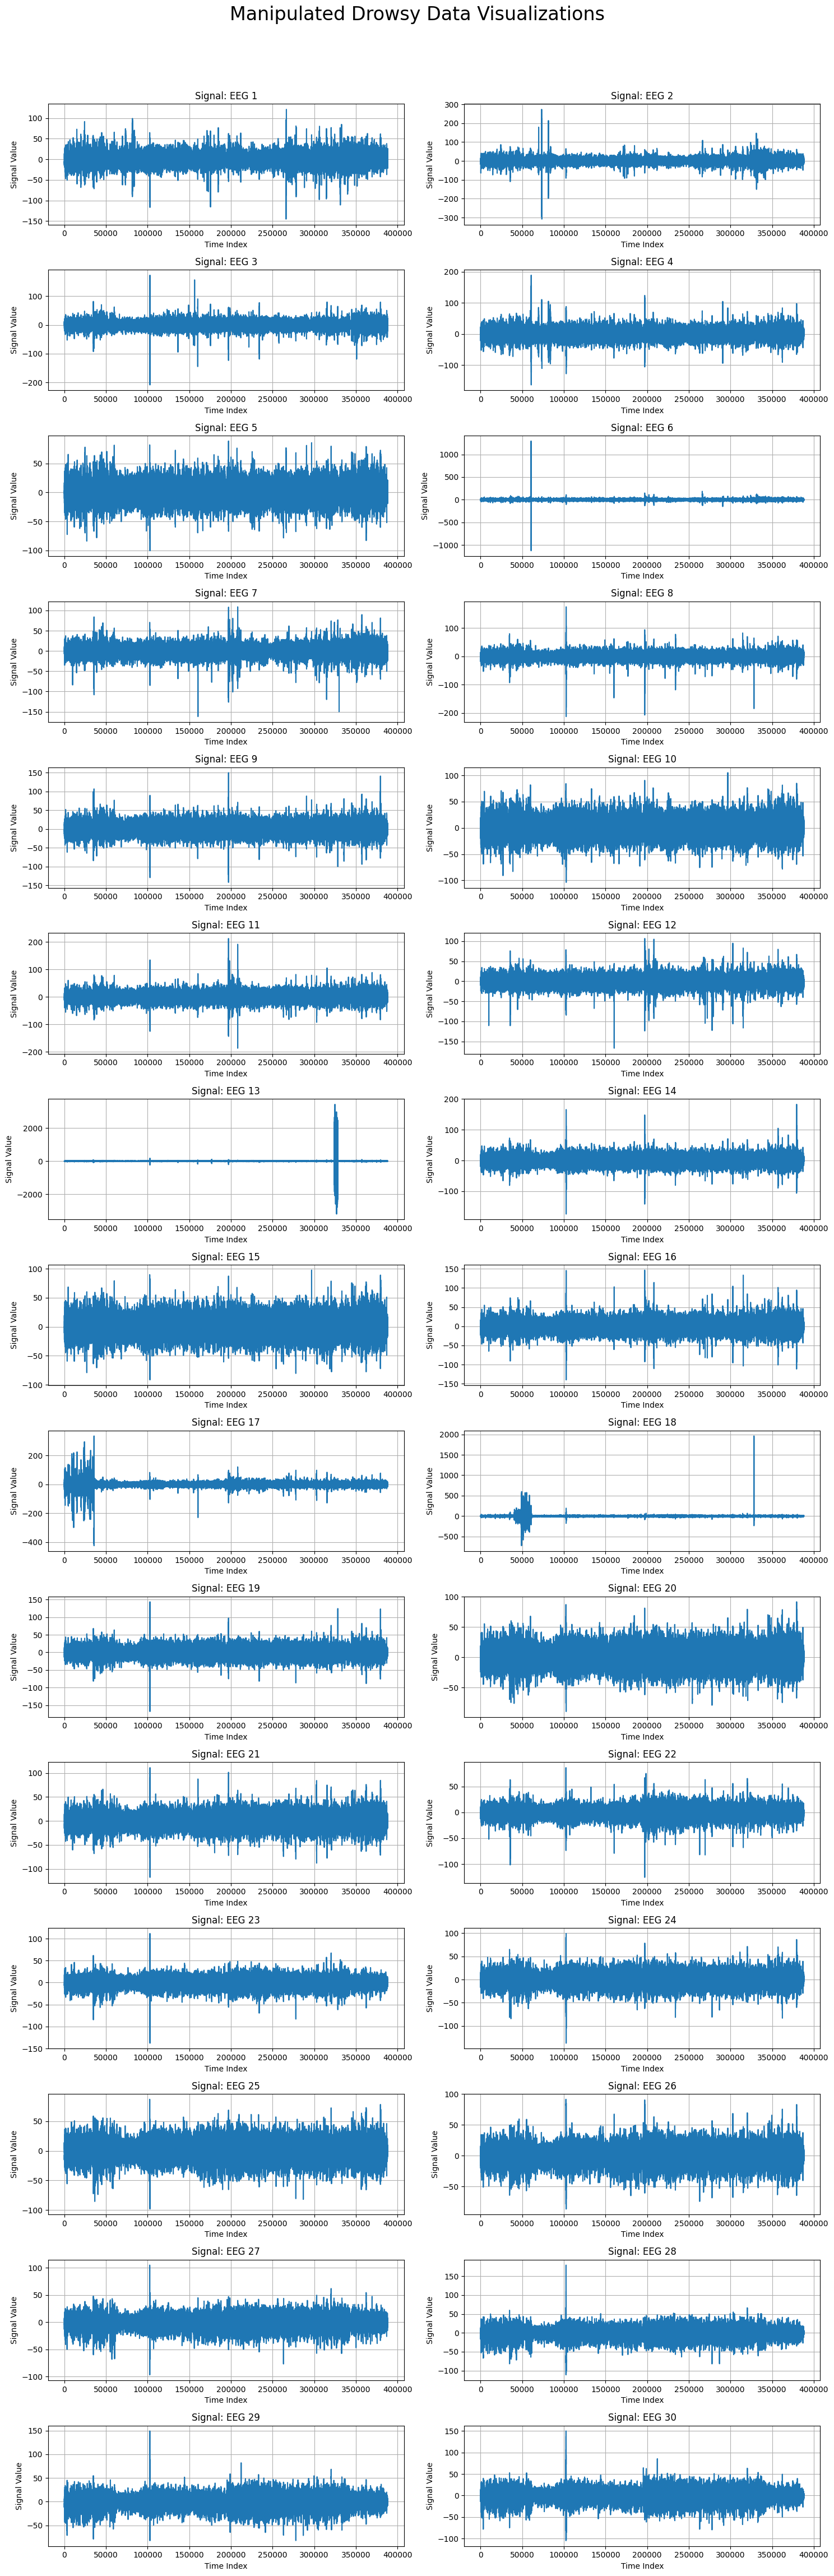

In [31]:
columns_of_interest = Manipulated_drowsy_data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_drowsy_data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Drowsy Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Creating new Manipulated EEG Data

In [32]:
# Concatenate them row-wise
Manipulated_EEG_Data = pd.concat([Manipulated_Alert_Data, Manipulated_drowsy_data], ignore_index=True)

Manipulated_EEG_Data = pd.DataFrame(Manipulated_EEG_Data)

Manipulated_EEG_Data

EEG 1     EEG 2      EEG 3      EEG 4     EEG 5     EEG 6  \
0       4.080976  3.786023   8.346804   6.719097  8.357521  8.916676   
1       5.363737  6.188060   8.691601   6.594982  7.950093  8.835506   
2       2.168923  1.727106  -0.010906  10.583628  2.440252  1.746089   
3       6.682761  4.633752   2.093427  16.253235  6.105603  3.943814   
4       9.795314  8.723788  10.936554   8.182007  8.306618  7.103265   
...          ...       ...        ...        ...       ...       ...   
776443  6.868306  2.037630  10.935329   3.053171  2.061508 -2.051896   
776444  3.248673 -3.479991   8.520732  -0.933774 -2.160580 -5.932663   
776445  5.805058  2.770440   8.983543   1.738981 -0.541900 -8.541175   
776446  7.142978  0.775242   9.888220   4.223264  0.790337 -6.479811   
776447  5.365745 -2.340104  10.145127   3.204299  0.128407 -4.656551   

            EEG 7      EEG 8      EEG 9     EEG 10  ...    EEG 22    EEG 23  \
0        6.862104   9.614278   8.955653  11.076102  ...  4.477457  1.590643   
1        7.987136   8.394441   7.126653   8.356511  ...  2.415757  1.918520   
2        1.159202  -1.002561   7.059705   1.720240  ... -4.692833  4.261903   
3        4.016592   2.393903  17.343024   6.441727  ...  0.839859  2.543160   
4        7.980278  12.270826   9.309045   6.750704  ...  2.970653 -0.216052   
...           ...        ...        ...        ...  ...       ...       ...   
776443  -6.980084   6.915801   1.292861  -2.156677  ...  0.466622  1.703162   
776444 -12.832424   4.543766  -2.418177  -6.189452  ... -1.080016  2.258167   
776445  -8.517280   3.491680  -1.389771  -5.822860  ... -3.365152  3.624552   
776446 -12.121178   4.921120   0.083320  -4.330250  ... -2.798542  4.248466   
776447 -13.939822   9.154483   1.264282  -3.263205  ... -2.442473  4.421849   

          EEG 24    EEG 25    EEG 26    EEG 27    EEG 28    EEG 29    EEG 30  \
0       8.856600  6.898189  3.846108  1.618809  1.528848 -1.199498  1.594009   
1       7.423708  3.755487  1.427838 -0.657721  0.793796 -1.544962  1.900514   
2       3.151329 -1.637562 -5.816451 -8.913891 -1.451266 -4.319859 -4.644263   
3       7.499411  4.182199 -0.059025 -0.736035  4.434387  3.438641  1.207515   
4       5.413562  5.600711  2.837383  4.172009  0.202442  1.743480  3.413565   
...          ...       ...       ...       ...       ...       ...       ...   
776443  0.489967 -0.037224 -1.715912  1.355944  0.816035  0.522263 -0.399985   
776444 -0.767202 -2.633476 -5.121715 -0.736463  0.412399 -0.159130 -2.200928   
776445  0.280940 -3.084484 -4.691478 -3.197477  0.923831  1.341110 -1.338262   
776446  1.042023 -2.643634 -3.409195 -2.482608  1.644079  1.565844 -0.301095   
776447  3.490519 -0.725364 -2.018021 -1.486724  2.468541  1.679269  0.412523   

        substate  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
776443         1  
776444         1  
776445         1  
776446         1  
776447         1  

[776448 rows x 31 columns]

In [33]:
Manipulated_EEG_Data.describe()

EEG 1          EEG 2          EEG 3          EEG 4  \
count  776448.000000  776448.000000  776448.000000  776448.000000   
mean       -0.021618      -0.040802      -0.004570      -0.055523   
std        14.620990      14.905172       9.671696      23.275682   
min      -573.236473   -1299.322323    -208.160484   -1302.310821   
25%        -5.350544      -5.673096      -4.867582      -5.980532   
50%        -0.156583      -0.151739      -0.057676      -0.110664   
75%         5.073020       5.396961       4.732961       5.728880   
max       871.907755     911.153120     243.285973    1795.543933   

               EEG 5          EEG 6          EEG 7          EEG 8  \
count  776448.000000  776448.000000  776448.000000  776448.000000   
mean       -0.068220      -0.066261      -0.053505      -0.011565   
std        10.725436      22.324431      11.260219       8.925568   
min      -259.186417   -1914.601674    -496.506648    -257.126168   
25%        -6.031645      -6.040908      -5.034842      -4.501781   
50%        -0.136852      -0.094769      -0.051081      -0.000729   
75%         5.750800       5.840688       4.904647       4.418808   
max       157.868435    1294.240965     754.210204     178.262784   

               EEG 9         EEG 10  ...         EEG 22         EEG 23  \
count  776448.000000  776448.000000  ...  776448.000000  776448.000000   
mean       -0.053644      -0.060294  ...      -0.017509      -0.026515   
std        10.520814      11.073835  ...       7.917922       7.899842   
min      -264.446044    -170.110365  ...    -412.436568    -164.084974   
25%        -5.895260      -6.349755  ...      -3.989990      -4.059459   
50%        -0.110086      -0.133952  ...       0.042863       0.049731   
75%         5.661637       6.091726  ...       4.026763       4.130372   
max       358.262495     172.711611  ...     169.197791     221.973860   

              EEG 24         EEG 25         EEG 26         EEG 27  \
count  776448.000000  776448.000000  776448.000000  776448.000000   
mean       -0.049814      -0.049215      -0.048120      -0.014090   
std         9.362213       9.966547       9.443160       7.901001   
min      -182.130863    -160.504457    -188.102204    -300.202835   
25%        -5.113621      -5.467732      -5.173702      -4.049075   
50%        -0.028798      -0.051791      -0.036366       0.070813   
75%         5.037588       5.361387       5.104271       4.161815   
max       228.132948     167.531582     191.191891     159.280290   

              EEG 28         EEG 29         EEG 30  substate  
count  776448.000000  776448.000000  776448.000000  776448.0  
mean       -0.008072      -0.014516      -0.006941       0.5  
std         9.166132       8.790766       9.168400       0.5  
min      -155.316775    -164.679904    -170.630668       0.0  
25%        -4.513315      -4.367126      -4.517431       0.0  
50%         0.095885       0.052832       0.077466       0.5  
75%         4.700240       4.482325       4.689910       1.0  
max       179.167203     149.156242     149.996483       1.0  

[8 rows x 31 columns]

In [34]:
Manipulated_EEG_Data.shape

(776448, 31)

In [35]:
Manipulated_EEG_Data["substate"].value_counts()

0    388224
1    388224
Name: substate, dtype: int64

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Data Filtration</h2>
    
</div>


# Data Filtration - Savitzky-Golay filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html

In [36]:
Manipulated_Alert_Data = Manipulated_Alert_Data
Manipulated_drowsy_data = Manipulated_drowsy_data

In [37]:
from scipy.signal import savgol_filter

# Define the parameters for the Savitzky-Golay filter
window_length = 90043
polyorder = 1

In [38]:
# Function to apply Savitzky-Golay filter to a dataset
def apply_savgol_filter(dataset):
    filtered_data = pd.DataFrame()
    for col_name in dataset.columns[:-1]:
        filtered_column = savgol_filter(
            dataset[col_name], window_length, polyorder
        )
        filtered_data[f'Filtered_EEG_{col_name[-2:]}'] = filtered_column
    filtered_data['substate'] = dataset['substate']
    return filtered_data

In [39]:
# Apply Savitzky-Golay filter to both datasets
filtered_alert_data = apply_savgol_filter(Manipulated_Alert_Data)
filtered_drowsy_data = apply_savgol_filter(Manipulated_drowsy_data)

In [40]:
Manipulated_Alert_Data

EEG 1      EEG 2      EEG 3      EEG 4      EEG 5      EEG 6  \
0        4.080976   3.786023   8.346804   6.719097   8.357521   8.916676   
1        5.363737   6.188060   8.691601   6.594982   7.950093   8.835506   
2        2.168923   1.727106  -0.010906  10.583628   2.440252   1.746089   
3        6.682761   4.633752   2.093427  16.253235   6.105603   3.943814   
4        9.795314   8.723788  10.936554   8.182007   8.306618   7.103265   
...           ...        ...        ...        ...        ...        ...   
388219   8.233965   0.275736   6.446871   5.908036   9.747110  11.439683   
388220   7.406664   9.878674  -3.062066   9.699165  12.825886  16.227294   
388221  13.849187  15.022659  -0.428879  12.096121  18.726862  20.367732   
388222  16.960690  11.183629   8.472685   8.712444  17.208050  19.493375   
388223   6.120572   0.036418   4.256910  10.888335  13.246690  23.589833   

            EEG 7      EEG 8      EEG 9     EEG 10  ...     EEG 22     EEG 23  \
0        6.862104   9.614278   8.955653  11.076102  ...   4.477457   1.590643   
1        7.987136   8.394441   7.126653   8.356511  ...   2.415757   1.918520   
2        1.159202  -1.002561   7.059705   1.720240  ...  -4.692833   4.261903   
3        4.016592   2.393903  17.343024   6.441727  ...   0.839859   2.543160   
4        7.980278  12.270826   9.309045   6.750704  ...   2.970653  -0.216052   
...           ...        ...        ...        ...  ...        ...        ...   
388219  -1.685268   5.394103   5.898229  12.230832  ...  -6.909897  -8.072416   
388220  11.658202   0.792909   8.312962  14.986136  ...  -4.750323  -9.749710   
388221  21.341497  -0.920176  11.466241  19.145924  ...   2.819010 -14.607244   
388222  19.953374   2.115628  10.656352  18.752221  ...   9.265103 -15.256238   
388223  10.331308  -1.348828   9.539433  14.732780  ...  10.627132 -12.477297   

          EEG 24     EEG 25    EEG 26    EEG 27     EEG 28    EEG 29  \
0       8.856600   6.898189  3.846108  1.618809   1.528848 -1.199498   
1       7.423708   3.755487  1.427838 -0.657721   0.793796 -1.544962   
2       3.151329  -1.637562 -5.816451 -8.913891  -1.451266 -4.319859   
3       7.499411   4.182199 -0.059025 -0.736035   4.434387  3.438641   
4       5.413562   5.600711  2.837383  4.172009   0.202442  1.743480   
...          ...        ...       ...       ...        ...       ...   
388219 -0.579174   5.365872 -2.507618 -7.071795  -5.722929  2.618950   
388220  0.661105   7.605404  0.084582 -4.264237  -3.538781  3.539202   
388221  1.367658  10.402462  6.190984  3.495143  -5.398682  3.006524   
388222 -1.057022   8.016603  8.461495  8.418237  -9.056400  0.705703   
388223 -5.111024   2.032405  3.446180  9.829986 -12.673040 -3.879452   

          EEG 30  substate  
0       1.594009         0  
1       1.900514         0  
2      -4.644263         0  
3       1.207515         0  
4       3.413565         0  
...          ...       ...  
388219 -3.075700         0  
388220 -0.909379         0  
388221 -0.195928         0  
388222 -0.641096         0  
388223 -3.535439         0  

[388224 rows x 31 columns]

In [41]:
filtered_alert_data = pd.DataFrame(filtered_alert_data)
filtered_drowsy_data = pd.DataFrame(filtered_drowsy_data)

In [42]:
filtered_alert_data

Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
0              0.013190        -0.002242        -0.044920        -0.040989   
1              0.013191        -0.002241        -0.044919        -0.040988   
2              0.013193        -0.002240        -0.044917        -0.040987   
3              0.013194        -0.002238        -0.044916        -0.040985   
4              0.013196        -0.002237        -0.044914        -0.040984   
...                 ...              ...              ...              ...   
388219        -0.073721         0.008196         0.028899         0.177585   
388220        -0.073724         0.008193         0.028898         0.177589   
388221        -0.073728         0.008191         0.028898         0.177593   
388222        -0.073731         0.008188         0.028897         0.177597   
388223        -0.073735         0.008186         0.028897         0.177602   

        Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
0             -0.019217         0.043195        -0.030122        -0.030209   
1             -0.019216         0.043194        -0.030121        -0.030207   
2             -0.019216         0.043193        -0.030120        -0.030206   
3             -0.019215         0.043192        -0.030118        -0.030204   
4             -0.019215         0.043192        -0.030117        -0.030203   
...                 ...              ...              ...              ...   
388219         0.110547         0.165624         0.213089         0.047390   
388220         0.110548         0.165626         0.213093         0.047389   
388221         0.110548         0.165627         0.213096         0.047389   
388222         0.110548         0.165629         0.213099         0.047388   
388223         0.110549         0.165631         0.213103         0.047387   

        Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22  \
0             -0.014974        -0.016450  ...         0.043252   
1             -0.014973        -0.016449  ...         0.043252   
2             -0.014973        -0.016448  ...         0.043251   
3             -0.014972        -0.016447  ...         0.043250   
4             -0.014972        -0.016447  ...         0.043250   
...                 ...              ...  ...              ...   
388219         0.087829         0.143349  ...         0.087530   
388220         0.087829         0.143350  ...         0.087530   
388221         0.087829         0.143351  ...         0.087530   
388222         0.087829         0.143352  ...         0.087530   
388223         0.087829         0.143353  ...         0.087530   

        Filtered_EEG_23  Filtered_EEG_24  Filtered_EEG_25  Filtered_EEG_26  \
0             -0.004956         0.044765        -0.002386         0.015589   
1             -0.004956         0.044763        -0.002386         0.015588   
2             -0.004956         0.044762        -0.002386         0.015587   
3             -0.004956         0.044760        -0.002387         0.015587   
4             -0.004956         0.044759        -0.002387         0.015586   
...                 ...              ...              ...              ...   
388219        -0.016150         0.085450         0.064268         0.105211   
388220        -0.016152         0.085450         0.064267         0.105211   
388221        -0.016154         0.085450         0.064266         0.105210   
388222        -0.016156         0.085449         0.064266         0.105210   
388223        -0.016158         0.085449         0.064265         0.105210   

        Filtered_EEG_27  Filtered_EEG_28  Filtered_EEG_29  Filtered_EEG_30  \
0              0.087291         0.055874         0.041430         0.033169   
1              0.087289         0.055873         0.041429         0.033169   
2              0.087288         0.055872         0.041429         0.033168   
3              0.087286         0.055871         0.041428         0.033168   
4             

In [43]:
filtered_alert_data.describe()

Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean          0.116135         0.079042         0.050682         0.004608   
std           0.096003         0.076168         0.038902         0.055155   
min          -0.273980        -0.189506        -0.098718        -0.207416   
25%           0.049442         0.025075         0.029661        -0.017592   
50%           0.097760         0.056937         0.056069         0.008811   
75%           0.137259         0.129128         0.077229         0.028532   
max           0.621599         0.464988         0.162544         0.177602   

       Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean          0.022479         0.023837         0.021201         0.045002   
std           0.045618         0.055402         0.055323         0.033036   
min          -0.130966        -0.170241        -0.180703        -0.118781   
25%          -0.006341        -0.014518        -0.014658         0.027358   
50%           0.008291         0.014983         0.013511         0.053154   
75%           0.041845         0.043051         0.045842         0.066152   
max           0.131250         0.165631         0.213103         0.132355   

       Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22  \
count    388224.000000    388224.000000  ...    388224.000000   
mean          0.022782         0.018019  ...         0.022480   
std           0.042514         0.055517  ...         0.044144   
min          -0.111867        -0.139834  ...        -0.122655   
25%          -0.002138        -0.018417  ...        -0.013999   
50%           0.012832         0.004847  ...         0.015913   
75%           0.040848         0.030978  ...         0.054547   
max           0.149456         0.143353  ...         0.146890   

       Filtered_EEG_23  Filtered_EEG_24  Filtered_EEG_25  Filtered_EEG_26  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean          0.005282        -0.002440         0.019230         0.011181   
std           0.038535         0.060322         0.047641         0.062142   
min          -0.127748        -0.132974        -0.103057        -0.106192   
25%          -0.015467        -0.050201        -0.015647        -0.035497   
50%          -0.002721        -0.018466        -0.001882        -0.005900   
75%           0.019664         0.036515         0.052957         0.056339   
max           0.129258         0.130118         0.161636         0.157916   

       Filtered_EEG_27  Filtered_EEG_28  Filtered_EEG_29  Filtered_EEG_30  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean          0.034732         0.009498        -0.012738         0.014016   
std           0.041160         0.038989         0.067315         0.038987   
min          -0.053728        -0.114243        -0.201218        -0.090978   
25%           0.003873        -0.013018        -0.045858        -0.008404   
50%           0.020168         0.007468         0.002235         0.015443   
75%           0.071968         0.032163         0.026831         0.031052   
max           0.149258         0.144228         0.141506         0.143974   

       substate  
count  388224.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 31 columns]

In [44]:
filtered_drowsy_data

Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
0             -0.055135        -0.148136        -0.123670        -0.109145   
1             -0.055136        -0.148138        -0.123669        -0.109146   
2             -0.055138        -0.148141        -0.123668        -0.109146   
3             -0.055140        -0.148144        -0.123667        -0.109146   
4             -0.055141        -0.148147        -0.123666        -0.109146   
...                 ...              ...              ...              ...   
388219         0.102091         0.196167         0.119301         0.141347   
388220         0.102099         0.196176         0.119305         0.141352   
388221         0.102106         0.196186         0.119308         0.141358   
388222         0.102114         0.196195         0.119311         0.141363   
388223         0.102121         0.196204         0.119315         0.141368   

        Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
0             -0.034024        -0.038755        -0.089836        -0.165170   
1             -0.034027        -0.038761        -0.089838        -0.165170   
2             -0.034030        -0.038768        -0.089839        -0.165169   
3             -0.034033        -0.038775        -0.089841        -0.165168   
4             -0.034036        -0.038781        -0.089843        -0.165167   
...                 ...              ...              ...              ...   
388219         0.135704         0.105198         0.023295         0.085793   
388220         0.135710         0.105202         0.023300         0.085795   
388221         0.135716         0.105207         0.023305         0.085797   
388222         0.135722         0.105212         0.023310         0.085799   
388223         0.135729         0.105216         0.023315         0.085801   

        Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22  \
0             -0.056478         0.031587  ...        -0.117476   
1             -0.056479         0.031584  ...        -0.117476   
2             -0.056481         0.031582  ...        -0.117476   
3             -0.056482         0.031579  ...        -0.117476   
4             -0.056483         0.031576  ...        -0.117476   
...                 ...              ...  ...              ...   
388219         0.136198         0.134123  ...         0.041147   
388220         0.136203         0.134129  ...         0.041148   
388221         0.136209         0.134134  ...         0.041149   
388222         0.136214         0.134139  ...         0.041150   
388223         0.136220         0.134144  ...         0.041151   

        Filtered_EEG_23  Filtered_EEG_24  Filtered_EEG_25  Filtered_EEG_26  \
0             -0.075407        -0.065438        -0.036501        -0.071744   
1             -0.075406        -0.065437        -0.036502        -0.071745   
2             -0.075405        -0.065437        -0.036502        -0.071745   
3             -0.075405        -0.065437        -0.036502        -0.071746   
4             -0.075404        -0.065436        -0.036503        -0.071747   
...                 ...              ...              ...              ...   
388219         0.048828         0.081775         0.048621         0.049420   
388220         0.048829         0.081777         0.048623         0.049422   
388221         0.048830         0.081780         0.048626         0.049423   
388222         0.048832         0.081782         0.048629         0.049425   
388223         0.048833         0.081785         0.048632         0.049427   

        Filtered_EEG_27  Filtered_EEG_28  Filtered_EEG_29  Filtered_EEG_30  \
0             -0.034969        -0.018715        -0.020148        -0.022711   
1             -0.034969        -0.018714        -0.020148        -0.022711   
2             -0.034970        -0.018713        -0.020149        -0.022711   
3             -0.034970        -0.018713        -0.020149        -0.022711   
4             

In [45]:
filtered_drowsy_data.describe()

Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean         -0.155700        -0.153329        -0.059416        -0.108347   
std           0.100230         0.105536         0.078606         0.077111   
min          -0.430127        -0.347308        -0.294060        -0.331010   
25%          -0.221626        -0.238773        -0.095752        -0.140369   
50%          -0.149393        -0.160877        -0.063101        -0.115527   
75%          -0.087286        -0.085231        -0.029101        -0.089301   
max           0.102121         0.196204         0.119315         0.141368   

       Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean         -0.151139        -0.144370        -0.120443        -0.069254   
std           0.086238         0.134629         0.078890         0.080765   
min          -0.380738        -0.636515        -0.271541        -0.263888   
25%          -0.206528        -0.211115        -0.186970        -0.131153   
50%          -0.160015        -0.132049        -0.134344        -0.068135   
75%          -0.099970        -0.052142        -0.043962        -0.005423   
max           0.135729         0.105216         0.059352         0.087772   

       Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22  \
count    388224.000000    388224.000000  ...    388224.000000   
mean         -0.124578        -0.131611  ...        -0.055868   
std           0.073301         0.091839  ...         0.060898   
min          -0.303369        -0.356571  ...        -0.168010   
25%          -0.168317        -0.184591  ...        -0.119570   
50%          -0.133533        -0.146571  ...        -0.057007   
75%          -0.086181        -0.080166  ...         0.000465   
max           0.136220         0.134144  ...         0.053664   

       Filtered_EEG_23  Filtered_EEG_24  Filtered_EEG_25  Filtered_EEG_26  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean         -0.059604        -0.094246        -0.115212        -0.104861   
std           0.065640         0.070242         0.073265         0.064720   
min          -0.255605        -0.260117        -0.303765        -0.248444   
25%          -0.082869        -0.134354        -0.151092        -0.144857   
50%          -0.052271        -0.089535        -0.106439        -0.105199   
75%          -0.020413        -0.052959        -0.063662        -0.070167   
max           0.059420         0.081785         0.048632         0.049427   

       Filtered_EEG_27  Filtered_EEG_28  Filtered_EEG_29  Filtered_EEG_30  \
count    388224.000000    388224.000000    388224.000000    388224.000000   
mean         -0.060326        -0.025785        -0.016449        -0.029420   
std           0.069728         0.073673         0.060935         0.053799   
min          -0.246247        -0.218560        -0.164709        -0.147820   
25%          -0.083955        -0.055723        -0.049794        -0.052934   
50%          -0.046262        -0.000656        -0.021910        -0.023488   
75%          -0.012442         0.027186         0.037182         0.006952   
max           0.066849         0.122849         0.107553         0.087926   

       substate  
count  388224.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

In [46]:
# Concatenate both datasets row-wise
filtered_data = pd.concat([filtered_alert_data, filtered_drowsy_data], ignore_index=True)

### Filtered Alert Data Visualization

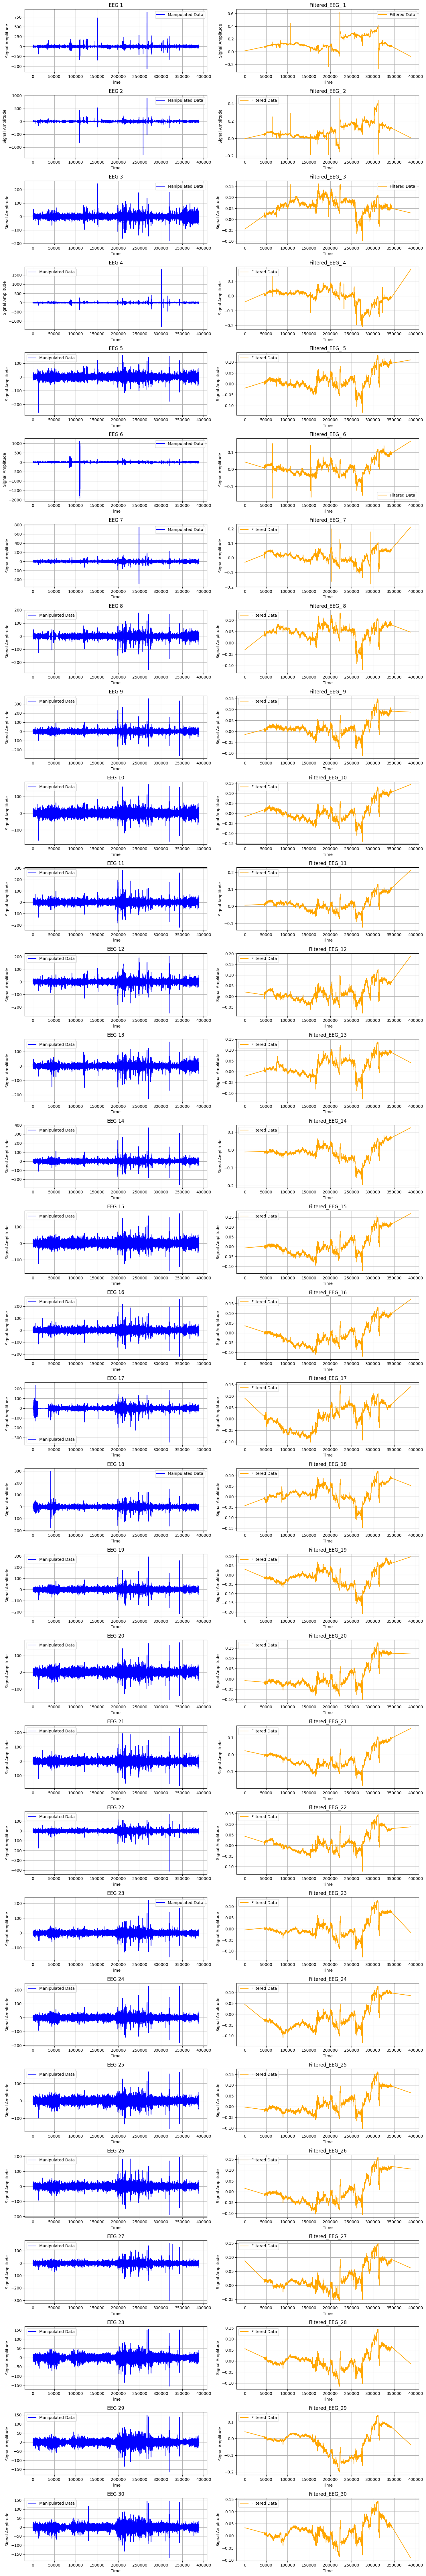

In [47]:
# Extract column names
Manipulated_Alert_Data_columns = Manipulated_Alert_Data.columns[:-1]
filtered_alert_data_columns = filtered_alert_data.columns[:-1]

# Set the number of rows and columns
num_rows = len(Manipulated_Alert_Data_columns)
num_cols = 2 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Plotting for each column in separate figures
for i, (col_manipulated, col_filtered) in enumerate(zip(Manipulated_Alert_Data_columns, filtered_alert_data_columns)):

    # Plot Manipulated Data
    axes[i, 0].plot(Manipulated_Alert_Data[col_manipulated], color='blue', label='Manipulated Data')
    axes[i, 0].set_title(f'{col_manipulated}')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Signal Amplitude')
    axes[i, 0].legend()
    axes[i, 0].grid(True)  

    # Plot Filtered Data
    axes[i, 1].plot(filtered_alert_data[col_filtered], color='orange', label='Filtered Data')
    axes[i, 1].set_title(f'{col_filtered}')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Signal Amplitude')
    axes[i, 1].legend()
    axes[i, 1].grid(True)  

plt.tight_layout()
plt.show()


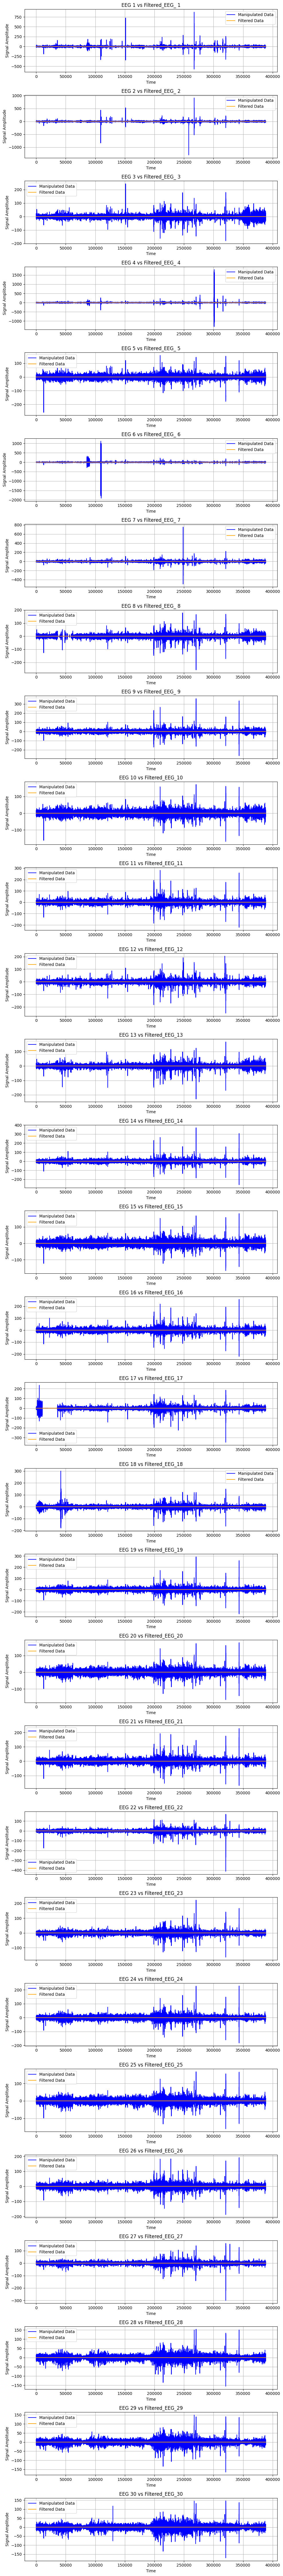

In [48]:
# Extract column names 
Manipulated_Alert_Data_columns = Manipulated_Alert_Data.columns[:-1]
filtered_alert_data_columns = filtered_alert_data.columns[:-1]

# Set the number of rows and columns 
num_rows = len(Manipulated_Alert_Data_columns)
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

# Plotting for each column in the same figure
for i, (col_manipulated, col_filtered) in enumerate(zip(Manipulated_Alert_Data_columns, filtered_alert_data_columns)):
    
    axes[i].plot(Manipulated_Alert_Data[col_manipulated], color='blue', label='Manipulated Data')
    axes[i].plot(filtered_alert_data[col_filtered], color='orange', label='Filtered Data')
    
    axes[i].set_title(f'{col_manipulated} vs {col_filtered}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Amplitude')
    
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()


### Filtered Drowsy Data Visualization

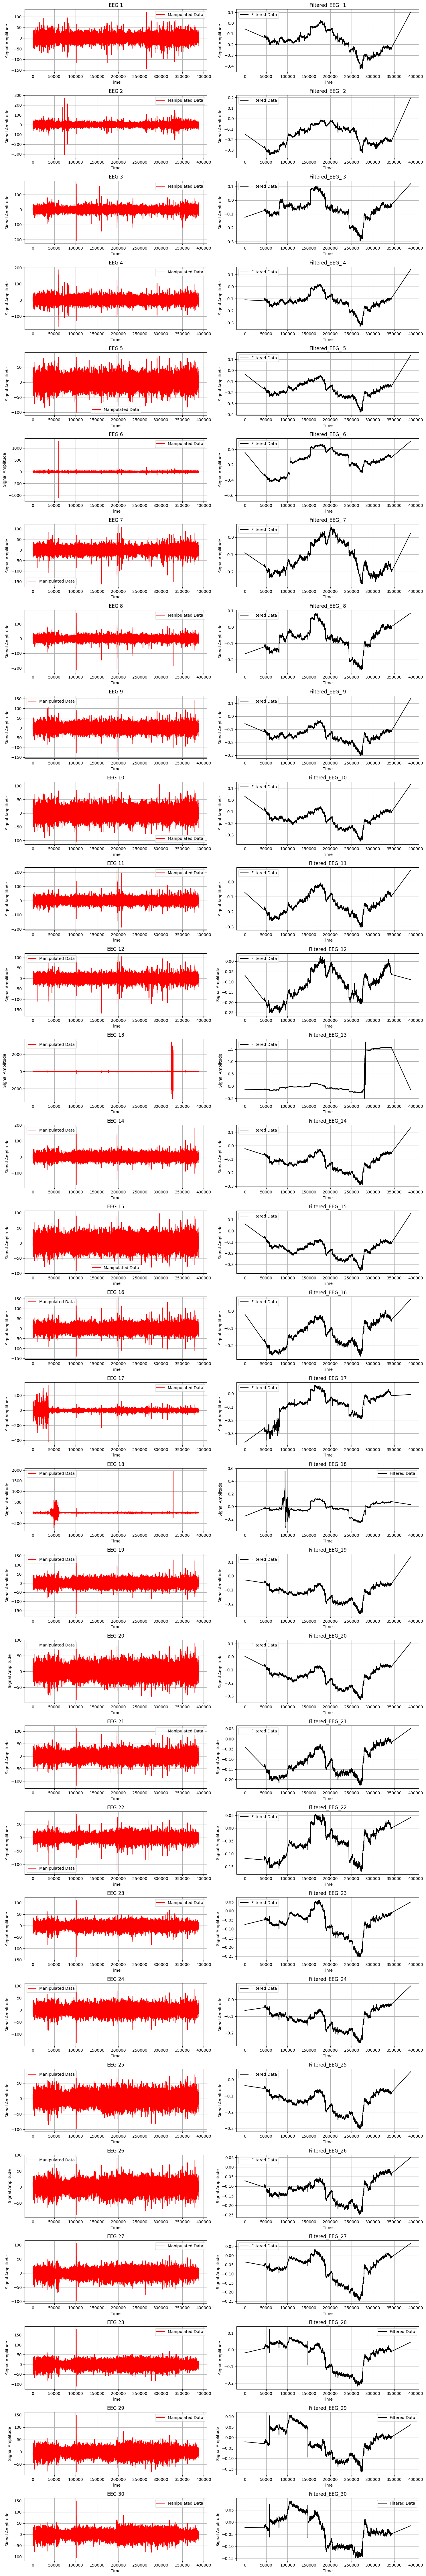

In [49]:
Manipulated_drowsy_data_columns = Manipulated_drowsy_data.columns[:-1]
filtered_drowsy_data_columns = filtered_drowsy_data.columns[:-1]

# Set the number of rows and columns 
num_rows = len(Manipulated_drowsy_data_columns)
num_cols = 2  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Plotting for each column in separate figures
for i, (col_manipulated, col_filtered) in enumerate(zip(Manipulated_drowsy_data_columns, filtered_drowsy_data_columns)):

    # Plot Manipulated Data
    axes[i, 0].plot(Manipulated_drowsy_data[col_manipulated], color='red', label='Manipulated Data')
    axes[i, 0].set_title(f'{col_manipulated}')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Signal Amplitude')
    axes[i, 0].legend()
    axes[i, 0].grid(True) 

    # Plot Filtered Data
    axes[i, 1].plot(filtered_drowsy_data[col_filtered], color='black', label='Filtered Data')
    axes[i, 1].set_title(f'{col_filtered}')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Signal Amplitude')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

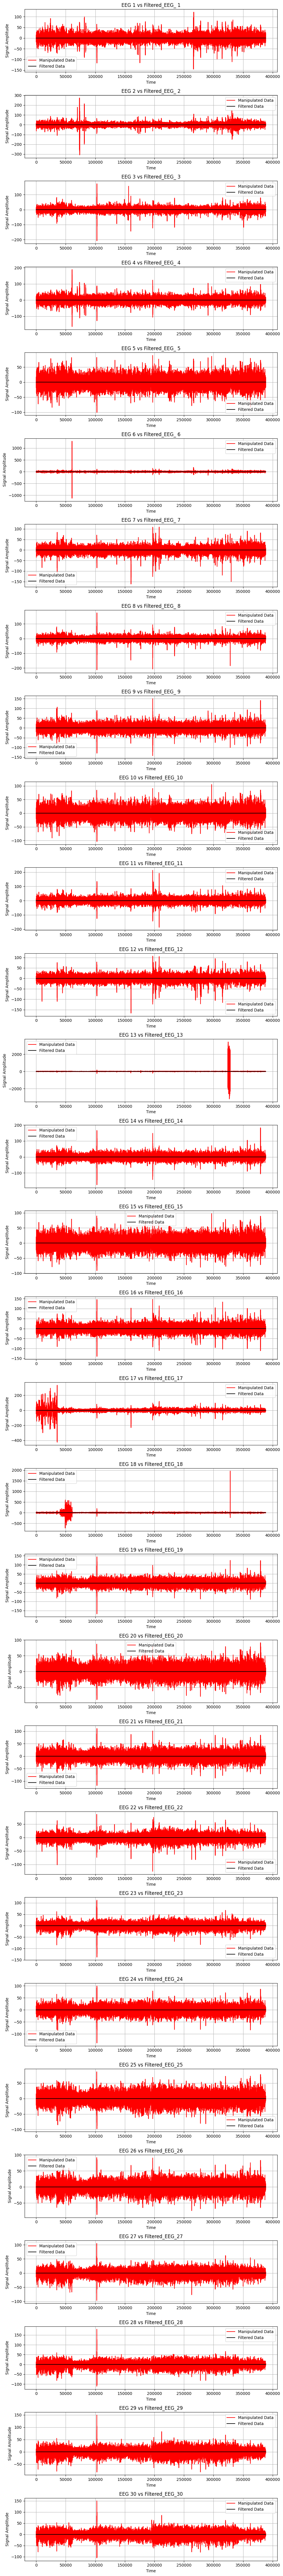

In [50]:
# Extract column names
Manipulated_drowsy_data_columns = Manipulated_drowsy_data.columns[:-1]
filtered_drowsy_data_columns = filtered_drowsy_data.columns[:-1]

# Set the number of rows and columns
num_rows = len(Manipulated_drowsy_data_columns)
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

# Plotting for each column in the same figure
for i, (col_manipulated, col_filtered) in enumerate(zip(Manipulated_drowsy_data_columns, filtered_drowsy_data_columns)):
    
    axes[i].plot(Manipulated_drowsy_data[col_manipulated], color='red', label='Manipulated Data')
    axes[i].plot(filtered_drowsy_data[col_filtered], color='black', label='Filtered Data')  
    
    axes[i].set_title(f'{col_manipulated} vs {col_filtered}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Amplitude')
    
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()


# Shuffle Dataset

In [51]:
from sklearn.utils import shuffle

# Shuffle the combined dataset
shuffled_data = shuffle(filtered_data, random_state=42)

# Display the resulting shuffled DataFrame
print(shuffled_data.head())

        Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
31373          0.056860         0.032519        -0.001865        -0.001311   
503322        -0.176366        -0.167026        -0.055109        -0.133161   
192821         0.095278         0.062721         0.106967         0.051860   
604921        -0.135285        -0.061823        -0.073295        -0.122463   
110346         0.115358         0.017325         0.083932         0.013585   

        Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
31373          0.000180         0.019272         0.006385         0.016212   
503322        -0.172809        -0.168551        -0.157535        -0.052552   
192821         0.023809         0.021440        -0.005318         0.072372   
604921        -0.215078        -0.060676        -0.005076        -0.081629   
110346        -0.004973        -0.020049         0.004881         0.046593   

        Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22

In [52]:
data = shuffled_data

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  

In [53]:
X

Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
31373          0.056860         0.032519        -0.001865        -0.001311   
503322        -0.176366        -0.167026        -0.055109        -0.133161   
192821         0.095278         0.062721         0.106967         0.051860   
604921        -0.135285        -0.061823        -0.073295        -0.122463   
110346         0.115358         0.017325         0.083932         0.013585   
...                 ...              ...              ...              ...   
259178         0.266353         0.159171         0.019910        -0.081744   
365838         0.006109         0.063577         0.039513         0.083111   
131932         0.113031         0.020944         0.072404         0.020478   
671155        -0.310283        -0.201200        -0.134029        -0.183386   
121958         0.135844         0.039405         0.102679         0.036294   

        Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
31373          0.000180         0.019272         0.006385         0.016212   
503322        -0.172809        -0.168551        -0.157535        -0.052552   
192821         0.023809         0.021440        -0.005318         0.072372   
604921        -0.215078        -0.060676        -0.005076        -0.081629   
110346        -0.004973        -0.020049         0.004881         0.046593   
...                 ...              ...              ...              ...   
259178        -0.035220        -0.041670        -0.024616        -0.013265   
365838         0.102769         0.129981         0.136394         0.063108   
131932         0.000794        -0.019373        -0.005593         0.041076   
671155        -0.209837        -0.159724        -0.152125        -0.109993   
121958         0.014749        -0.008477         0.015447         0.055928   

        Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_21  \
31373          0.000810         0.007119  ...         0.005930   
503322        -0.164415        -0.196351  ...        -0.144327   
192821         0.008001         0.003735  ...        -0.057488   
604921        -0.178506        -0.233974  ...        -0.177568   
110346         0.008137        -0.020237  ...        -0.047334   
...                 ...              ...  ...              ...   
259178        -0.035078        -0.047398  ...        -0.083326   
365838         0.090066         0.124393  ...         0.126444   
131932         0.014205        -0.021652  ...        -0.051052   
671155        -0.159724        -0.187494  ...        -0.061793   
121958         0.021349        -0.004988  ...        -0.046779   

        Filtered_EEG_22  Filtered_EEG_23  Filtered_EEG_24  Filtered_EEG_25  \
31373          0.023124         0.000923        -0.005263        -0.010809   
503322        -0.064912        -0.027268        -0.130968        -0.151808   
192821        -0.012734         0.003753        -0.012261         0.012707   
604921        -0.048845        -0.131069        -0.187436        -0.224465   
110346        -0.020684        -0.003579        -0.064681        -0.023328   
...                 ...              ...              ...              ...   
259178        -0.005697        -0.052902        -0.049498        -0.015091   
365838         0.083539         0.029647         0.091519         0.079737   
131932        -0.029542        -0.014873        -0.042060        -0.015092   
671155        -0.020544        -0.078389        -0.091243        -0.137132   
121958        -0.026536         0.001636        -0.043747        -0.018473   

        Filtered_EEG_26  Filtered_EEG_27  Filtered_EEG_28  Filtered_EEG_29  \
31373         -0.003359         0.038819         0.027712         0.019883   
503322        -0.121827        -0.016714         0.053541         0.082345   
192821        -0.039527        -0.017033        -0.034843        -0.089787   
604921        -0.195380        -0.148541        -0.147000        -0.121580   
110346        

In [54]:
y

31373     0
503322    1
192821    0
604921    1
110346    0
         ..
259178    0
365838    0
131932    0
671155    1
121958    0
Name: substate, Length: 776448, dtype: int64

# Shapley Approximation (shap)

https://github.com/shap/shap

In [55]:
#Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
import shap
import xgboost as xgb

In [57]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "gpu_hist",
}

In [58]:
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [59]:
# Explain predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizations - Shapley Approximation (shap)

In [60]:
# Calculate feature importance
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
X_cols = ft_importance.query('`Feature Importance` > 0').sort_values(by="Feature Importance", ascending=False)

# Display
X_cols.style.background_gradient(cmap='viridis', vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})


### SHAP Summary Plot

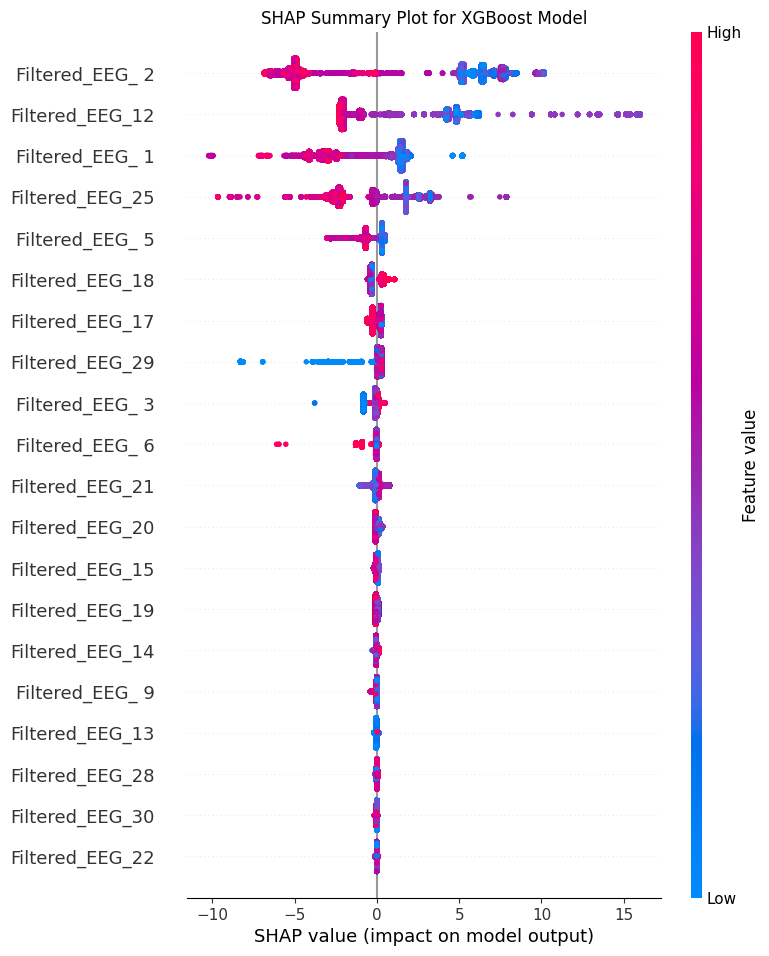

In [61]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for XGBoost Model")
plt.show()

### SHAP Bar plot

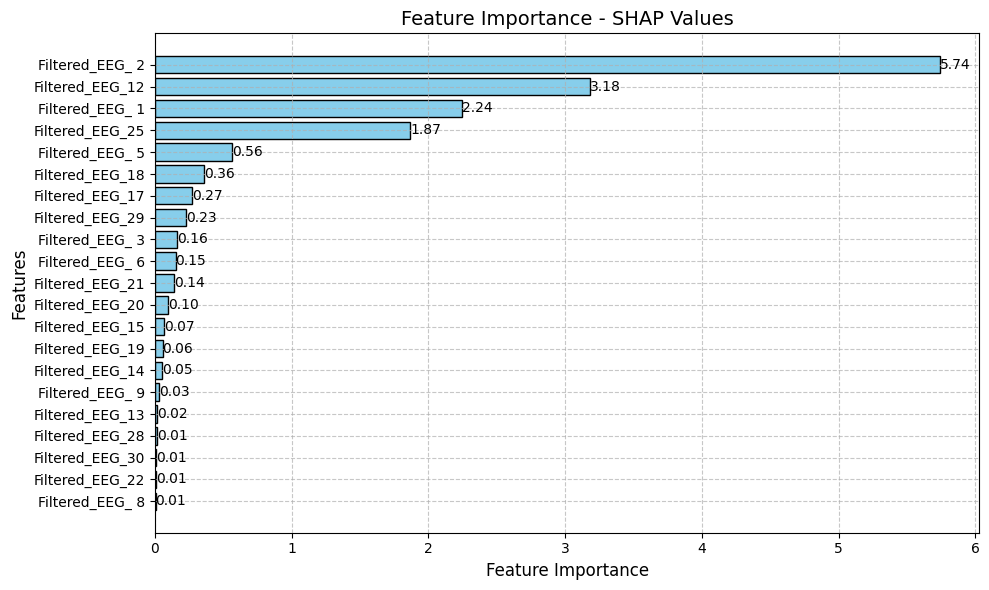

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.barh(X_cols.index, X_cols['Feature Importance'], color='skyblue', edgecolor='black')
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance - SHAP Values', fontsize=14)
ax.invert_yaxis()


for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            '{:.2f}'.format(bar.get_width()), 
            va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

### SHAP Scatter plot

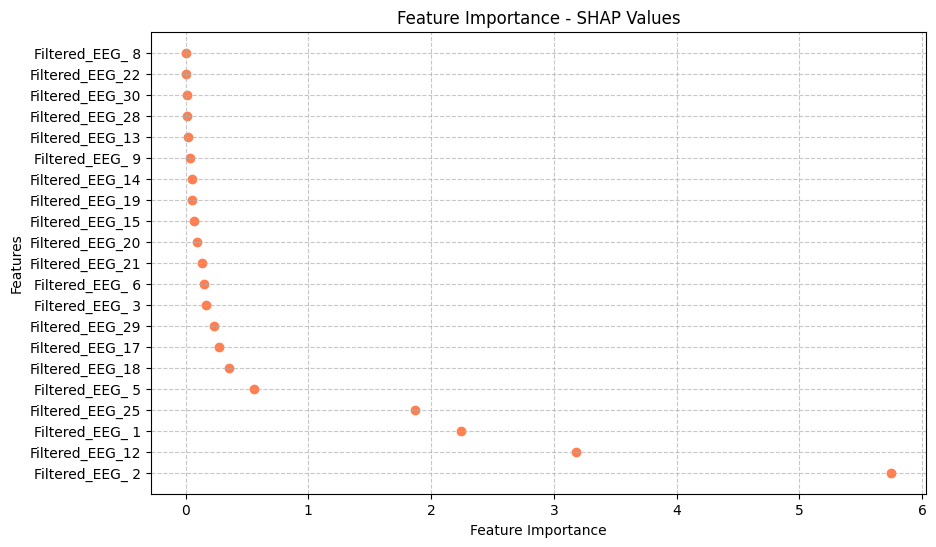

In [63]:
# Scatter plot of feature importance
plt.figure(figsize=(10, 6))
plt.scatter(X_cols['Feature Importance'], X_cols.index, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - SHAP Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### SHAP Pie Chart

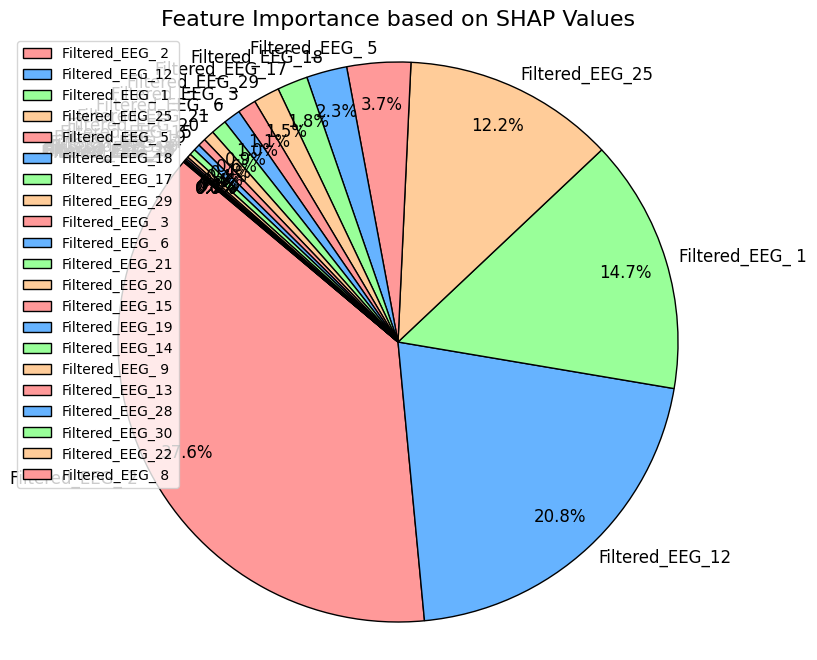

In [64]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10, 8))


plt.pie(X_cols['Feature Importance'], 
        labels=X_cols.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,      
        wedgeprops={'edgecolor': 'black'},  
        textprops={'fontsize': 12},  
        pctdistance=0.85,     
        labeldistance=1.05)   


plt.legend(X_cols.index, loc="best")
plt.title('Feature Importance based on SHAP Values', fontsize=16)
plt.axis('equal')
plt.show()

# Feature Selection using SHAP Values

In [65]:
# Calculate feature importance using mean absolute SHAP values
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
top_3_features = ft_importance.sort_values(by="Feature Importance", ascending=False).index[:4]

# Use selected features for further analysis or prediction
reduced_X_train = X_train[top_3_features]
reduced_X_test = X_test[top_3_features]

In [66]:
reduced_X_train

Filtered_EEG_ 2  Filtered_EEG_12  Filtered_EEG_ 1  Filtered_EEG_25
120597         0.036087        -0.005687         0.136922        -0.018813
485239        -0.243117        -0.205393        -0.171848        -0.133481
760929         0.054621        -0.080657        -0.013451         0.004603
325213         0.145327         0.077585         0.126461         0.094959
132923         0.019140        -0.016280         0.110818        -0.012097
...                 ...              ...              ...              ...
565842        -0.019606         0.012487         0.017883        -0.066856
629510        -0.090115        -0.121710        -0.193442        -0.221651
414260        -0.222771        -0.138960        -0.100172        -0.046867
696415        -0.234483        -0.082692        -0.275743        -0.063059
445814        -0.326766        -0.230273        -0.182517        -0.077595

[621158 rows x 4 columns]

In [67]:
reduced_X_test

Filtered_EEG_ 2  Filtered_EEG_12  Filtered_EEG_ 1  Filtered_EEG_25
139433         0.008335        -0.027748         0.099761        -0.016005
527024        -0.106100        -0.131474        -0.129830        -0.141618
640745        -0.106735        -0.156412        -0.248464        -0.221228
361557         0.074170         0.116407         0.021378         0.082696
163987         0.029975         0.009494         0.062002        -0.034612
...                 ...              ...              ...              ...
238967         0.139031         0.010558         0.223377         0.025472
467044        -0.313101        -0.228677        -0.193203        -0.109063
139715         0.006206        -0.029972         0.093448        -0.020467
523374        -0.108127        -0.126825        -0.127133        -0.133821
526502        -0.107724        -0.129522        -0.130271        -0.139801

[155290 rows x 4 columns]

# Machine Learning Algorithms

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### K-Nearest Neighbors (KNN)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(reduced_X_train, y_train)

# Make predictions on the test set using KNN
y_pred_knn = knn_model.predict(reduced_X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print evaluation metrics for KNN
print("\nK-Nearest Neighbors Model:")
print(f'Accuracy: {accuracy_knn:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_knn)
print('\nClassification Report:')
print(classification_rep_knn)


K-Nearest Neighbors Model:
Accuracy: 1.0000

Confusion Matrix:
[[77676     0]
 [    0 77614]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77676
           1       1.00      1.00      1.00     77614

    accuracy                           1.00    155290
   macro avg       1.00      1.00      1.00    155290
weighted avg       1.00      1.00      1.00    155290



### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(reduced_X_train, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(reduced_X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("\nRandom Forest Model:")
print(f'Accuracy: {accuracy_rf:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(classification_rep_rf)



Random Forest Model:
Accuracy: 1.0000

Confusion Matrix:
[[77676     0]
 [    0 77614]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77676
           1       1.00      1.00      1.00     77614

    accuracy                           1.00    155290
   macro avg       1.00      1.00      1.00    155290
weighted avg       1.00      1.00      1.00    155290



### XGBoost (with GPU)

In [71]:
import xgboost as xgb

# Define and train the XGBoost model (with GPU)
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)
xgb_model.fit(reduced_X_train, y_train)

# Make predictions on the test set using XGBoost
y_pred_xgb = xgb_model.predict(reduced_X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print evaluation metrics for XGBoost
print("\nXGBoost Model (with GPU):")
print(f'Accuracy: {accuracy_xgb:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_xgb)
print('\nClassification Report:')
print(classification_rep_xgb)



XGBoost Model (with GPU):
Accuracy: 1.0000

Confusion Matrix:
[[77676     0]
 [    0 77614]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77676
           1       1.00      1.00      1.00     77614

    accuracy                           1.00    155290
   macro avg       1.00      1.00      1.00    155290
weighted avg       1.00      1.00      1.00    155290



### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(reduced_X_train, y_train)

# Make predictions on the test set using Decision Tree
y_pred_dt = dt_model.predict(reduced_X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree
print("\nDecision Tree Model:")
print(f'Accuracy: {accuracy_dt:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_dt)
print('\nClassification Report:')
print(classification_rep_dt)


Decision Tree Model:
Accuracy: 1.0000

Confusion Matrix:
[[77675     1]
 [    0 77614]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77676
           1       1.00      1.00      1.00     77614

    accuracy                           1.00    155290
   macro avg       1.00      1.00      1.00    155290
weighted avg       1.00      1.00      1.00    155290

